In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pept import PointData
from scipy.interpolate import interp1d
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib widget

In [6]:
def loadTruePath(path: str) -> PointData:
    data = np.loadtxt(path, skiprows = 3)
    points = np.array([data[:, 0], data[:, 5], data[:, 6], data[:, 7]]).T
    pData = PointData(points)
    return pData

In [3]:
# TRUE PATH
# Small lambda
sLambda_sTau_true = loadTruePath("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_0.1mm_Varying_Tau_0.08_1.20ms/Placements/RW3_TS_0.10ms_SS_0.10mm.placements")
sLambda_lTau_true = loadTruePath("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_0.1mm_Varying_Tau_0.08_1.20ms/Placements/RW3_TS_1.00ms_SS_0.10mm.placements")
# Large lambda
lLambda_sTau_true = loadTruePath("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_2.0mm_Varying_Tau_0.08_1.20ms/Placements/RW3_TS_0.10ms_SS_2.00mm.placements")
lLambda_lTau_true = loadTruePath("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_2.0mm_Varying_Tau_0.08_1.20ms/Placements/RW3_TS_1.00ms_SS_2.00mm.placements")

In [4]:
# TRACKED PATH
# Small lambda
sLambda_sTau_tracked = PointData(np.load("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_0.1mm_Varying_Tau_0.08_1.20ms/Tracks/RW3_TS_0.10ms_SS_0.10mm.npy"))
sLambda_lTau_tracked = PointData(np.load("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_0.1mm_Varying_Tau_0.08_1.20ms/Tracks/RW3_TS_1.00ms_SS_0.10mm.npy"))
# Large lambda
lLambda_sTau_tracked = PointData(np.load("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_2.0mm_Varying_Tau_0.08_1.20ms/Tracks/RW3_TS_0.10ms_SS_2.00mm.npy"))
lLambda_lTau_tracked = PointData(np.load("/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_2.0mm_Varying_Tau_0.08_1.20ms/Tracks/RW3_TS_1.00ms_SS_2.00mm.npy"))


In [16]:
def errorCalculation(truePath: PointData, trackedPath: PointData) -> np.float64:
    fx = interp1d(trackedPath['t'], trackedPath['x'], fill_value = "extrapolate", kind = "slinear")
    xInterp = fx(truePath['t'])
    residX = xInterp - truePath['x']
    return residX

In [17]:
sLambda_sTau_resid = errorCalculation(truePath = sLambda_sTau_true, trackedPath = sLambda_sTau_tracked)
sLambda_lTau_resid = errorCalculation(truePath = sLambda_lTau_true, trackedPath = sLambda_lTau_tracked)
lLambda_sTau_resid = errorCalculation(truePath = lLambda_sTau_true, trackedPath = lLambda_sTau_tracked)
lLambda_lTau_resid = errorCalculation(truePath = lLambda_lTau_true, trackedPath = lLambda_lTau_tracked)


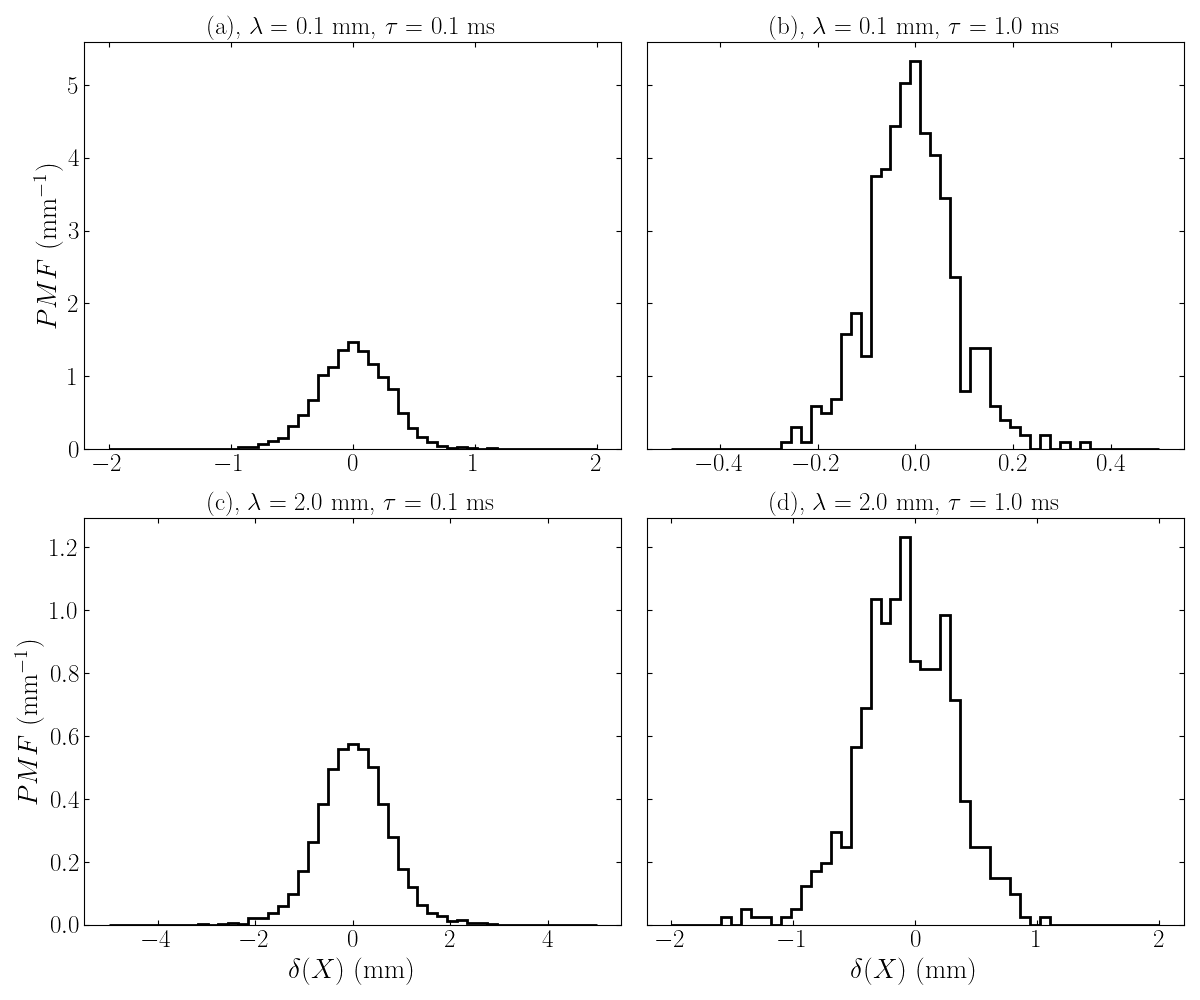

In [37]:
plt.close("all")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 10), sharey = "row")
s = 20

bins1 = np.linspace(-2, 2, 50)
bins2 = np.linspace(-0.5, 0.5, 50)
bins3 = np.linspace(-5, 5, 50)
bins4 = np.linspace(-2, 2, 50)
_, _, _ = ax1.hist(sLambda_sTau_resid, bins = bins1, histtype = "step", density = True, lw = 2, color = 'k')
_, _, _ = ax2.hist(sLambda_lTau_resid, bins = bins2, histtype = "step", density = True, lw = 2, color = 'k')
_, _, _ = ax3.hist(lLambda_sTau_resid, bins = bins3, histtype = "step", density = True, lw = 2, color = 'k')
_, _, _ = ax4.hist(lLambda_lTau_resid, bins = bins4, histtype = "step", density = True, lw = 2, color = 'k')

ax1.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax1.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax2.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax2.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax3.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax3.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax4.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax4.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)

ax1.tick_params(axis="x", labelsize = s - 2) 
ax1.tick_params(axis="y", labelsize = s - 2)
ax2.tick_params(axis="x", labelsize = s - 2) 
ax2.tick_params(axis="y", labelsize = s - 2)
ax3.tick_params(axis="x", labelsize = s - 2) 
ax3.tick_params(axis="y", labelsize = s - 2)
ax4.tick_params(axis="x", labelsize = s - 2) 
ax4.tick_params(axis="y", labelsize = s - 2)

ax3.set_xlabel(r"$\delta(X)$ (mm)", fontsize = s)
ax4.set_xlabel(r"$\delta(X)$ (mm)", fontsize = s)

ax1.set_ylabel(r"$PMF$ (mm$^{-1}$)", fontsize = s)
ax3.set_ylabel(r"$PMF$ (mm$^{-1}$)", fontsize = s)

ax1.set_title(r"(a), $\lambda$ = 0.1 mm, $\tau$ = 0.1 ms", fontsize = s - 2)
ax2.set_title(r"(b), $\lambda$ = 0.1 mm, $\tau$ = 1.0 ms", fontsize = s - 2)
ax3.set_title(r"(c), $\lambda$ = 2.0 mm, $\tau$ = 0.1 ms", fontsize = s - 2)
ax4.set_title(r"(d), $\lambda$ = 2.0 mm, $\tau$ = 1.0 ms", fontsize = s - 2)

fig.tight_layout()
fig.savefig("/home/rayhaan/randomWalk_V3/Plots/EdgeCaseDeviationsPlots.png", dpi = 300)
